----------------------------------------------------------------------------------------------------------------------------------------------------------------------
# DATA MINING: ASSOCIATION RULE MINING
----------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Load the necessary libraries and dataset.

In [467]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from apyori import apriori
import mlxtend.frequent_patterns as fp

In [468]:
df = pd.read_csv(r'DATA (1).csv')

display(df.head())

,STUDENT ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,1,1,2,3,1,2,5,3,2,2,1,1,1,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,1,2,3,2,1,2,1,2,2,2,1,1,1,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,2,2,2,2,1,2,1,2,1,2,1,1,1,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,2,1,2,5,1,2,1,3,1,2,1,1,1,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,4,3,3,2,1,2,4,2,1,1,1,1,1,2,1,2,2,2,1,2,2,1,1


In [469]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STUDENT ID  145 non-null    object
 1   1           145 non-null    int64 
 2   2           145 non-null    int64 
 3   3           145 non-null    int64 
 4   4           145 non-null    int64 
 5   5           145 non-null    int64 
 6   6           145 non-null    int64 
 7   7           145 non-null    int64 
 8   8           145 non-null    int64 
 9   9           145 non-null    int64 
 10  10          145 non-null    int64 
 11  11          145 non-null    int64 
 12  12          145 non-null    int64 
 13  13          145 non-null    int64 
 14  14          145 non-null    int64 
 15  15          145 non-null    int64 
 16  16          145 non-null    int64 
 17  17          145 non-null    int64 
 18  18          145 non-null    int64 
 19  19          145 non-null    int64 
 20  20        

----------------------------------------------------------------------------------------------------------------------------------------------------------------------
# DATA EXPLORATION AND DATA PREPROCESSING
----------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Data Preprocessing Part 1

### Renaming Columns

In [470]:
new_column_names = [
    'Student ID', 'Student Age', 'Sex', 'High School Type', 'Scholarship Type','Additional Work','Artistic or Sports Activity','Having a Partner','Total Salary (USD)','Transportation','Accommodation Type',
    'Mothers Education','Fathers Education','Number of Siblings','Parental Status','Mothers Occupation Type','Fathers Occupation Type',
    'Weekly Study Hours','Reading Frequency (Non-scientific)','Reading Frequency (Scientific)','Attendance to Seminars/Conferences','Impact of Projects/Activities on Success','Attendance to Classes',
    'Preparation for Midterm Exams 1','Preparation for Midterm Exams 2','Taking Notes in Classes','Listening in Classes','Discussion Improves Interest and Success','Flip Classroom',
    'CGPA Last Semester','Expected CGPA in Graduation','Course ID', 'Grade'
]


# Assign these new names to the DataFrame
df.columns = new_column_names

df.head()

,Student ID,Student Age,Sex,High School Type,Scholarship Type,Additional Work,Artistic or Sports Activity,Having a Partner,Total Salary (USD),Transportation,Accommodation Type,Mothers Education,Fathers Education,Number of Siblings,Parental Status,Mothers Occupation Type,Fathers Occupation Type,Weekly Study Hours,Reading Frequency (Non-scientific),Reading Frequency (Scientific),Attendance to Seminars/Conferences,Impact of Projects/Activities on Success,Attendance to Classes,Preparation for Midterm Exams 1,Preparation for Midterm Exams 2,Taking Notes in Classes,Listening in Classes,Discussion Improves Interest and Success,Flip Classroom,CGPA Last Semester,Expected CGPA in Graduation,Course ID,Grade
0,STUDENT1,2,2,3,3,1,2,2,1,1,1,1,2,3,1,2,5,3,2,2,1,1,1,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,1,2,3,2,1,2,1,2,2,2,1,1,1,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,2,2,2,2,1,2,1,2,1,2,1,1,1,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,2,1,2,5,1,2,1,3,1,2,1,1,1,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,4,3,3,2,1,2,4,2,1,1,1,1,1,2,1,2,2,2,1,2,2,1,1


### Check for Duplicates

In [471]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Student ID, Student Age, Sex, High School Type, Scholarship Type, Additional Work, Artistic or Sports Activity, Having a Partner, Total Salary (USD), Transportation, Accommodation Type, Mothers Education, Fathers Education, Number of Siblings, Parental Status, Mothers Occupation Type, Fathers Occupation Type, Weekly Study Hours, Reading Frequency (Non-scientific), Reading Frequency (Scientific), Attendance to Seminars/Conferences, Impact of Projects/Activities on Success, Attendance to Classes, Preparation for Midterm Exams 1, Preparation for Midterm Exams 2, Taking Notes in Classes, Listening in Classes, Discussion Improves Interest and Success, Flip Classroom, CGPA Last Semester, Expected CGPA in Graduation, Course ID, Grade]
Index: []


### Check for Null Values

In [472]:
null_values_count = df.isna().sum()
print(null_values_count)

Student ID                                  0
Student Age                                 0
Sex                                         0
High School Type                            0
Scholarship Type                            0
Additional Work                             0
Artistic or Sports Activity                 0
Having a Partner                            0
Total Salary (USD)                          0
Transportation                              0
Accommodation Type                          0
Mothers Education                           0
Fathers Education                           0
Number of Siblings                          0
Parental Status                             0
Mothers Occupation Type                     0
Fathers Occupation Type                     0
Weekly Study Hours                          0
Reading Frequency (Non-scientific)          0
Reading Frequency (Scientific)              0
Attendance to Seminars/Conferences          0
Impact of Projects/Activities on S

## Data Exploration

In [473]:
# Function to add percentage labels to bar plots

def add_percentage_labels(ax, total):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center')

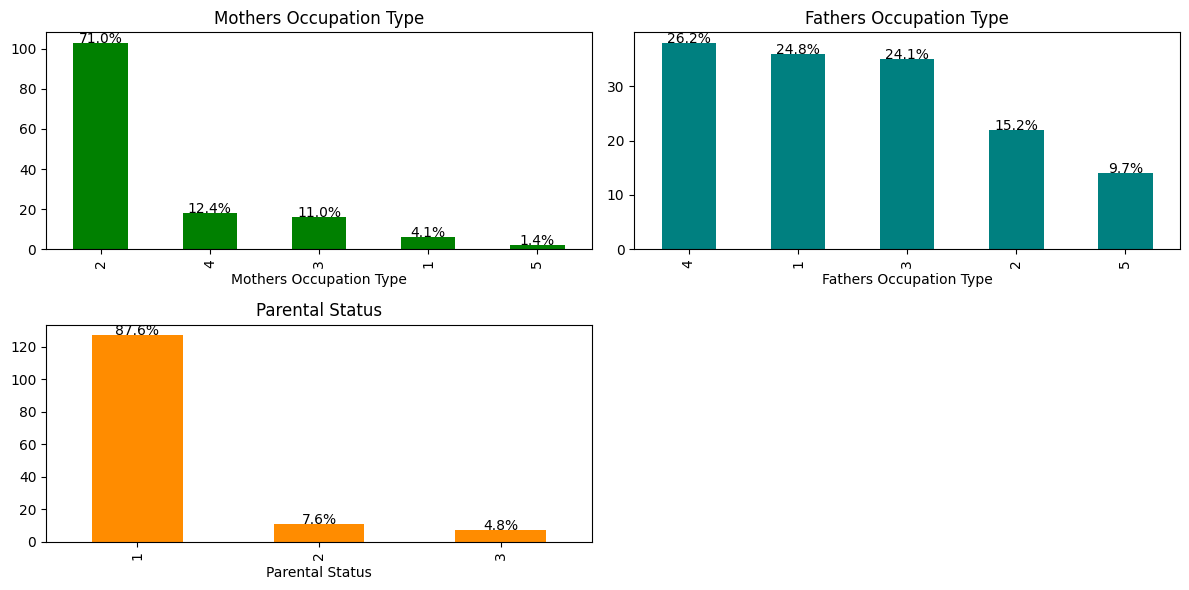

In [474]:
# Bar charts for Question 1: Parental Background Influence on Student Academic Performance
mothers_occupation_counts = df['Mothers Occupation Type'].value_counts()
fathers_occupation_counts = df['Fathers Occupation Type'].value_counts()
parental_status_counts = df['Parental Status'].value_counts()
cgpa_summary = df['Expected CGPA in Graduation'].describe()

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
mothers_occupation_counts.plot(kind='bar', title='Mothers Occupation Type', color='green')
add_percentage_labels(plt.gca(), len(df))
plt.subplot(2, 2, 2)
fathers_occupation_counts.plot(kind='bar', title='Fathers Occupation Type', color = 'teal')
add_percentage_labels(plt.gca(), len(df))
plt.subplot(2, 2, 3)
parental_status_counts.plot(kind='bar', title='Parental Status', color='darkorange')
add_percentage_labels(plt.gca(), len(df))
plt.tight_layout()
plt.show()



Text(0.5, 1.0, 'Having a Partner')

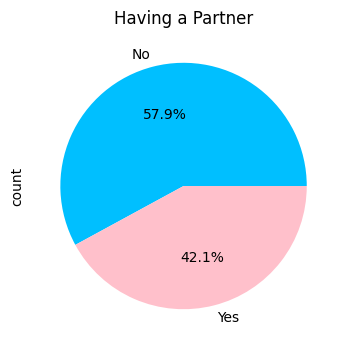

In [475]:
# Bar charts for Question 2: Relationship Influence on Student Academic Performance
partner_counts = df['Having a Partner'].value_counts()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
partner_counts.plot(kind='pie', autopct='%1.1f%%', labels=['No', 'Yes'], colors=['deepskyblue', 'pink'])
plt.title('Having a Partner')

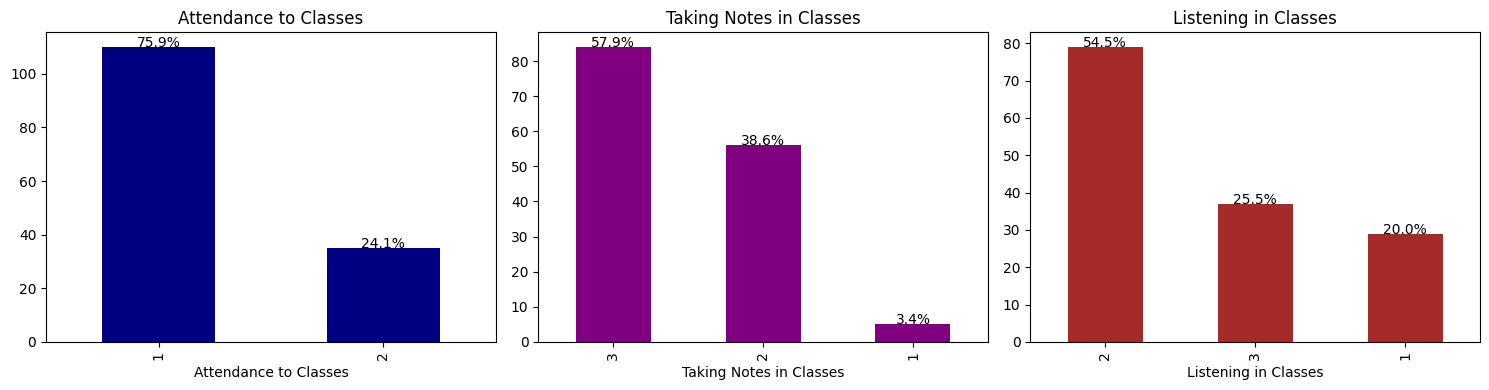

In [476]:
# Bar charts for Question 3: Class Engagement Impact on Student Academic Performance
attendance_counts = df['Attendance to Classes'].value_counts()
notes_counts = df['Taking Notes in Classes'].value_counts()
listening_counts = df['Listening in Classes'].value_counts()

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
attendance_counts.plot(kind='bar', title='Attendance to Classes', color='navy')
add_percentage_labels(plt.gca(), len(df))
plt.subplot(1, 3, 2)
notes_counts.plot(kind='bar', title='Taking Notes in Classes', color='purple')
add_percentage_labels(plt.gca(), len(df))
plt.subplot(1, 3, 3)
listening_counts.plot(kind='bar', title='Listening in Classes', color='brown')
add_percentage_labels(plt.gca(), len(df))
plt.tight_layout()
plt.show()

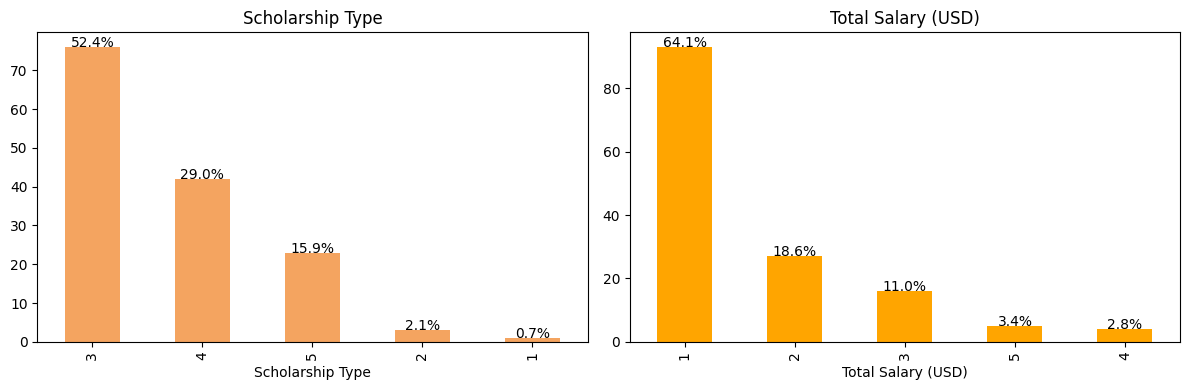

In [477]:
# Bar charts for Question 4: Financial Situation Effects on Student Academic Performance
scholarship_type_counts = df['Scholarship Type'].value_counts()
total_salary_counts = df['Total Salary (USD)'].value_counts()


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
scholarship_type_counts.plot(kind='bar', title='Scholarship Type', color='sandybrown')
add_percentage_labels(plt.gca(), len(df))
plt.subplot(1, 2, 2)
total_salary_counts.plot(kind='bar', title='Total Salary (USD)', color='orange')
add_percentage_labels(plt.gca(), len(df))
plt.tight_layout()
plt.show()

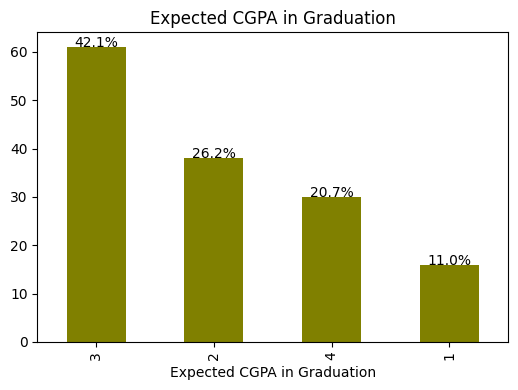

In [478]:
# Bar Chart for Target Variable: Expected CGPA in Graduation
partner_counts = df['Expected CGPA in Graduation'].value_counts()

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
partner_counts.plot(kind='bar', title='Expected CGPA in Graduation', color='olive')
add_percentage_labels(plt.gca(), len(df))
plt.tight_layout()
plt.show()

In [479]:
df_clean = df.copy()

## Data Preprocessing Part 2

### Feature Selection

In [480]:
# Feature Selection Based on Exploratory Questions
selected_features = [
    # Question 1: Parental Background 
    'Parental Status', 'Mothers Occupation Type', 'Fathers Occupation Type',  
    # Question 2: Relationship Status 
    'Having a Partner',
    # Question 3: Class Engagement 
    'Attendance to Classes', 'Taking Notes in Classes', 'Listening in Classes',
    # Question 4: Financial Status 
    'Scholarship Type', 'Total Salary (USD)', 
    # Target Variable: Expected CGPA
    'Expected CGPA in Graduation'
]

# Create a new DataFrame with only the selected features
df_clean = df_clean[selected_features]
df_clean.head()

,Parental Status,Mothers Occupation Type,Fathers Occupation Type,Having a Partner,Attendance to Classes,Taking Notes in Classes,Listening in Classes,Scholarship Type,Total Salary (USD),Expected CGPA in Graduation
0,1,2,5,2,1,3,2,3,1,1
1,1,2,1,2,1,3,2,3,1,3
2,1,2,1,2,1,2,2,3,2,2
3,1,2,1,1,1,3,2,3,2,2
4,1,2,4,1,1,2,2,3,3,2


### Data Transformation 1: Data Normalization

In [481]:
# Class Attendance Label Mapping to match Listening in Classes, Taking notes in Classes
mapping = {1: 3, 2: 2, 3: 1}

# Apply the mapping to the "Attendance to classes" column
df_clean['Attendance to Classes'] = df_clean['Attendance to Classes'].map(mapping)
df_clean.head()

,Parental Status,Mothers Occupation Type,Fathers Occupation Type,Having a Partner,Attendance to Classes,Taking Notes in Classes,Listening in Classes,Scholarship Type,Total Salary (USD),Expected CGPA in Graduation
0,1,2,5,2,3,3,2,3,1,1
1,1,2,1,2,3,3,2,3,1,3
2,1,2,1,2,3,2,2,3,2,2
3,1,2,1,1,3,3,2,3,2,2
4,1,2,4,1,3,2,2,3,3,2


### Data Transformation 2: Data Mapping

In [482]:
# Mapping dictionaries for class labels
parental_status = {1: 'Married', 2: 'Divorced', 3: 'Died - one of them or both'}
mothers_occupation = {1: 'Retired', 2: 'Housewife', 3: 'Government officer', 4: 'Private sector employee', 5: 'Self-employment', 6: 'Other'}
fathers_occupation = {1: 'Retired', 2: 'Government officer', 3: 'Private sector employee', 4: 'Self-employment', 5: 'Other'}
partner = {1: 'Yes', 2: 'No'}
attendance_classes = {1: 'Never', 2: 'Sometimes', 3: 'Always'}
taking_notes = {1: 'Never', 2: 'Sometimes', 3: 'Always'}
listening_classes = {1: 'Never', 2: 'Sometimes', 3: 'Always'}
scholarship = {1: '0%', 2: '25%', 3: '50%', 4: '75%', 5: '100%'}
total_salary = {1: '135-200', 2: '201-270', 3: '271-340', 4: '341-410', 5: '> 410'}
cgpa_expected = {1: '<2.00', 2: '2.00-2.49', 3: '2.50-2.99', 4: '3.00-3.49', 5: '> 3.49'}
grade = {0: 'Fail', 1: 'DD', 2: 'DC', 3: 'CC', 4: 'CB', 5: 'BB', 6: 'BA', 7: 'AA'}


# Apply mapping to columns
df_clean['Parental Status'] = df_clean['Parental Status'].map(parental_status)
df_clean['Mothers Occupation Type'] = df_clean['Mothers Occupation Type'].map(mothers_occupation)
df_clean['Fathers Occupation Type'] = df_clean['Fathers Occupation Type'].map(fathers_occupation)
df_clean['Having a Partner'] = df_clean['Having a Partner'].map(partner)
df_clean['Attendance to Classes'] = df_clean['Attendance to Classes'].map(attendance_classes)
df_clean['Taking Notes in Classes'] = df_clean['Taking Notes in Classes'].map(taking_notes)
df_clean['Listening in Classes'] = df_clean['Listening in Classes'].map(listening_classes)
df_clean['Scholarship Type'] = df_clean['Scholarship Type'].map(scholarship)
df_clean['Total Salary (USD)'] = df_clean['Total Salary (USD)'].map(total_salary)
df_clean['Expected CGPA in Graduation'] = df_clean['Expected CGPA in Graduation'].map(cgpa_expected)


df_clean.head(10)

,Parental Status,Mothers Occupation Type,Fathers Occupation Type,Having a Partner,Attendance to Classes,Taking Notes in Classes,Listening in Classes,Scholarship Type,Total Salary (USD),Expected CGPA in Graduation
0,Married,Housewife,Other,No,Always,Always,Sometimes,50%,135-200,<2.00
1,Married,Housewife,Retired,No,Always,Always,Sometimes,50%,135-200,2.50-2.99
2,Married,Housewife,Retired,No,Always,Sometimes,Sometimes,50%,201-270,2.00-2.49
3,Married,Housewife,Retired,Yes,Always,Always,Sometimes,50%,201-270,2.00-2.49
4,Married,Housewife,Self-employment,Yes,Always,Sometimes,Sometimes,50%,271-340,2.00-2.49
5,Married,Housewife,Private sector employee,No,Always,Never,Sometimes,50%,201-270,3.00-3.49
6,Married,Housewife,Self-employment,No,Sometimes,Always,Always,75%,135-200,3.00-3.49
7,Married,Private sector employee,Private sector employee,Yes,Always,Always,Sometimes,50%,201-270,<2.00
8,Married,Housewife,Self-employment,Yes,Always,Always,Sometimes,50%,135-200,2.50-2.99
9,Married,Housewife,Private sector employee,Yes,Sometimes,Sometimes,Sometimes,50%,271-340,2.00-2.49


### Data Transformation 3: One Hot Encoding for all 4 Dataframes

### Separate the cleaned dataset into 4 different Dataframes for Exploratory Questions

In [483]:
df1 = df_clean[['Parental Status', 'Mothers Occupation Type', 'Fathers Occupation Type', 'Expected CGPA in Graduation']]
df2 = df_clean[['Having a Partner', 'Expected CGPA in Graduation']]
df3 = df_clean[['Attendance to Classes', 'Taking Notes in Classes', 'Listening in Classes', 'Expected CGPA in Graduation']]
df4 = df_clean[['Scholarship Type', 'Total Salary (USD)', 'Expected CGPA in Graduation']]

In [484]:
df1_onehot = pd.get_dummies(df1, columns=df1.columns)
display(df1_onehot.head())

,Parental Status_Died - one of them or both,Parental Status_Divorced,Parental Status_Married,Mothers Occupation Type_Government officer,Mothers Occupation Type_Housewife,Mothers Occupation Type_Private sector employee,Mothers Occupation Type_Retired,Mothers Occupation Type_Self-employment,Fathers Occupation Type_Government officer,Fathers Occupation Type_Other,Fathers Occupation Type_Private sector employee,Fathers Occupation Type_Retired,Fathers Occupation Type_Self-employment,Expected CGPA in Graduation_2.00-2.49,Expected CGPA in Graduation_2.50-2.99,Expected CGPA in Graduation_3.00-3.49,Expected CGPA in Graduation_<2.00
0,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True
1,False,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False
2,False,False,True,False,True,False,False,False,False,False,False,True,False,True,False,False,False
3,False,False,True,False,True,False,False,False,False,False,False,True,False,True,False,False,False
4,False,False,True,False,True,False,False,False,False,False,False,False,True,True,False,False,False


In [485]:
df2_onehot = pd.get_dummies(df2, columns=df2.columns)
display(df2_onehot.head())

,Having a Partner_No,Having a Partner_Yes,Expected CGPA in Graduation_2.00-2.49,Expected CGPA in Graduation_2.50-2.99,Expected CGPA in Graduation_3.00-3.49,Expected CGPA in Graduation_<2.00
0,True,False,False,False,False,True
1,True,False,False,True,False,False
2,True,False,True,False,False,False
3,False,True,True,False,False,False
4,False,True,True,False,False,False


In [486]:
df3_onehot = pd.get_dummies(df3, columns=df3.columns)
display(df3_onehot.head())

,Attendance to Classes_Always,Attendance to Classes_Sometimes,Taking Notes in Classes_Always,Taking Notes in Classes_Never,Taking Notes in Classes_Sometimes,Listening in Classes_Always,Listening in Classes_Never,Listening in Classes_Sometimes,Expected CGPA in Graduation_2.00-2.49,Expected CGPA in Graduation_2.50-2.99,Expected CGPA in Graduation_3.00-3.49,Expected CGPA in Graduation_<2.00
0,True,False,True,False,False,False,False,True,False,False,False,True
1,True,False,True,False,False,False,False,True,False,True,False,False
2,True,False,False,False,True,False,False,True,True,False,False,False
3,True,False,True,False,False,False,False,True,True,False,False,False
4,True,False,False,False,True,False,False,True,True,False,False,False


In [487]:
df4_onehot = pd.get_dummies(df4, columns=df4.columns)
display(df4_onehot.head())

,Scholarship Type_0%,Scholarship Type_100%,Scholarship Type_25%,Scholarship Type_50%,Scholarship Type_75%,Total Salary (USD)_135-200,Total Salary (USD)_201-270,Total Salary (USD)_271-340,Total Salary (USD)_341-410,Total Salary (USD)_> 410,Expected CGPA in Graduation_2.00-2.49,Expected CGPA in Graduation_2.50-2.99,Expected CGPA in Graduation_3.00-3.49,Expected CGPA in Graduation_<2.00
0,False,False,False,True,False,True,False,False,False,False,False,False,False,True
1,False,False,False,True,False,True,False,False,False,False,False,True,False,False
2,False,False,False,True,False,False,True,False,False,False,True,False,False,False
3,False,False,False,True,False,False,True,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False,True,False,False,True,False,False,False


----------------------------------------------------------------------------------------------------------------------------------------------------------------------
# DATA MINING AND KNOWLEDGE EVALUATION
----------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Exploratory Question 1: Parental Background Influence On Student Academic Performance
# 
### Exploratory Variables: Mothers Occupation Type, Fathers Occupation Type, Parental Status <br/>
### Target Variable: Expected CGPA in Graduation

In [488]:
fp_apriori = fp.apriori(df1_onehot,min_support=0.2,use_colnames=True)
display(fp_apriori)

,support,itemsets
0,0.875862,(Parental Status_Married)
1,0.710345,(Mothers Occupation Type_Housewife)
2,0.241379,(Fathers Occupation Type_Private sector employee)
3,0.248276,(Fathers Occupation Type_Retired)
4,0.262069,(Fathers Occupation Type_Self-employment)
5,0.262069,(Expected CGPA in Graduation_2.00-2.49)
6,0.420690,(Expected CGPA in Graduation_2.50-2.99)
7,0.206897,(Expected CGPA in Graduation_3.00-3.49)
8,0.627586,"(Parental Status_Married, Mothers Occupation T..."
9,0.227586,(Fathers Occupation Type_Private sector employ...


In [489]:
assoc_rules = fp.association_rules(fp_apriori,metric='confidence', min_threshold=0.2,support_only=False)
display(assoc_rules)

assoc_rules.to_csv('Question 1 Rules.csv', columns=['antecedents', 'consequents', 'support', 'confidence', 'lift'], index=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Parental Status_Married),(Mothers Occupation Type_Housewife),0.875862,0.710345,0.627586,0.716535,1.008715,0.005422,1.021839,0.069597
1,(Mothers Occupation Type_Housewife),(Parental Status_Married),0.710345,0.875862,0.627586,0.883495,1.008715,0.005422,1.065517,0.029827
2,(Fathers Occupation Type_Private sector employee),(Parental Status_Married),0.241379,0.875862,0.227586,0.942857,1.076490,0.016171,2.172414,0.093664
3,(Parental Status_Married),(Fathers Occupation Type_Private sector employee),0.875862,0.241379,0.227586,0.259843,1.076490,0.016171,1.024945,0.572391
4,(Parental Status_Married),(Fathers Occupation Type_Retired),0.875862,0.248276,0.227586,0.259843,1.046588,0.010131,1.015627,0.358586
5,(Fathers Occupation Type_Retired),(Parental Status_Married),0.248276,0.875862,0.227586,0.916667,1.046588,0.010131,1.489655,0.059216
6,(Fathers Occupation Type_Self-employment),(Parental Status_Married),0.262069,0.875862,0.234483,0.894737,1.021550,0.004946,1.179310,0.028587
7,(Parental Status_Married),(Fathers Occupation Type_Self-employment),0.875862,0.262069,0.234483,0.267717,1.021550,0.004946,1.007712,0.169935
8,(Parental Status_Married),(Expected CGPA in Graduation_2.00-2.49),0.875862,0.262069,0.255172,0.291339,1.111687,0.025636,1.041303,0.809309
9,(Expected CGPA in Graduation_2.00-2.49),(Parental Status_Married),0.262069,0.875862,0.255172,0.973684,1.111687,0.025636,4.717241,0.136145


## Exploratory Question 2: Relationship Influence on Student Academic Performance
# 
### Exploratory Variables: Having A Partner <br/>
### Target Variable: Expected CGPA in Graduation


In [490]:
fp_apriori = fp.apriori(df2_onehot,min_support=0.2,use_colnames=True)
display(fp_apriori)

,support,itemsets
0,0.579310,(Having a Partner_No)
1,0.420690,(Having a Partner_Yes)
2,0.262069,(Expected CGPA in Graduation_2.00-2.49)
3,0.420690,(Expected CGPA in Graduation_2.50-2.99)
4,0.206897,(Expected CGPA in Graduation_3.00-3.49)
5,0.262069,"(Expected CGPA in Graduation_2.50-2.99, Having..."


In [491]:
assoc_rules = fp.association_rules(fp_apriori,metric='confidence', min_threshold=0.2,support_only=False)
display(assoc_rules)

assoc_rules.to_csv('Question 2 Rules.csv', columns=['antecedents', 'consequents', 'support', 'confidence', 'lift'], index=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Expected CGPA in Graduation_2.50-2.99),(Having a Partner_No),0.42069,0.57931,0.262069,0.622951,1.075332,0.018359,1.115742,0.120927
1,(Having a Partner_No),(Expected CGPA in Graduation_2.50-2.99),0.57931,0.42069,0.262069,0.452381,1.075332,0.018359,1.057871,0.166523


## Exploratory Question 3: Class Engagement on Student Academic Performance
# 
### Exploratory Variables: Attendance to Class, Taking Notes in Classes, Listening in Classes <br/>
### Target Variable: Expected Graduation in CGPA

In [492]:
fp_apriori = fp.apriori(df3_onehot,min_support=0.2,use_colnames=True)
display(fp_apriori)

,support,itemsets
0,0.758621,(Attendance to Classes_Always)
1,0.241379,(Attendance to Classes_Sometimes)
2,0.579310,(Taking Notes in Classes_Always)
3,0.386207,(Taking Notes in Classes_Sometimes)
4,0.255172,(Listening in Classes_Always)
5,0.200000,(Listening in Classes_Never)
6,0.544828,(Listening in Classes_Sometimes)
7,0.262069,(Expected CGPA in Graduation_2.00-2.49)
8,0.420690,(Expected CGPA in Graduation_2.50-2.99)
9,0.206897,(Expected CGPA in Graduation_3.00-3.49)


In [493]:
assoc_rules = fp.association_rules(fp_apriori,metric='confidence', min_threshold=0.3,support_only=False)
display(assoc_rules)

assoc_rules.to_csv('Question 3 Rules.csv', columns=['antecedents', 'consequents', 'support', 'confidence', 'lift'], index=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Taking Notes in Classes_Always),(Attendance to Classes_Always),0.579310,0.758621,0.482759,0.833333,1.098485,0.043282,1.448276,0.213115
1,(Attendance to Classes_Always),(Taking Notes in Classes_Always),0.758621,0.579310,0.482759,0.636364,1.098485,0.043282,1.156897,0.371429
2,(Taking Notes in Classes_Sometimes),(Attendance to Classes_Always),0.386207,0.758621,0.241379,0.625000,0.823864,-0.051605,0.643678,-0.258333
3,(Attendance to Classes_Always),(Taking Notes in Classes_Sometimes),0.758621,0.386207,0.241379,0.318182,0.823864,-0.051605,0.900230,-0.469697
4,(Listening in Classes_Always),(Attendance to Classes_Always),0.255172,0.758621,0.206897,0.810811,1.068796,0.013317,1.275862,0.086420
5,(Listening in Classes_Sometimes),(Attendance to Classes_Always),0.544828,0.758621,0.413793,0.759494,1.001151,0.000476,1.003630,0.002525
6,(Attendance to Classes_Always),(Listening in Classes_Sometimes),0.758621,0.544828,0.413793,0.545455,1.001151,0.000476,1.001379,0.004762
7,(Expected CGPA in Graduation_2.50-2.99),(Attendance to Classes_Always),0.420690,0.758621,0.310345,0.737705,0.972429,-0.008799,0.920259,-0.046658
8,(Attendance to Classes_Always),(Expected CGPA in Graduation_2.50-2.99),0.758621,0.420690,0.310345,0.409091,0.972429,-0.008799,0.980371,-0.105114
9,(Listening in Classes_Sometimes),(Taking Notes in Classes_Always),0.544828,0.579310,0.324138,0.594937,1.026974,0.008514,1.038578,0.057705


## Exploratory Question 4: Financial Situation Impact on Student Academic Performance
# 
### Exploratory Variables: Scholarship Type, Total Salary (USD) <br/>
### Target Variable: Expected Graduation in CGPA

In [494]:
fp_apriori = fp.apriori(df4_onehot,min_support=0.1,use_colnames=True)
display(fp_apriori)

,support,itemsets
0,0.158621,(Scholarship Type_100%)
1,0.524138,(Scholarship Type_50%)
2,0.289655,(Scholarship Type_75%)
3,0.641379,(Total Salary (USD)_135-200)
4,0.186207,(Total Salary (USD)_201-270)
5,0.110345,(Total Salary (USD)_271-340)
6,0.262069,(Expected CGPA in Graduation_2.00-2.49)
7,0.420690,(Expected CGPA in Graduation_2.50-2.99)
8,0.206897,(Expected CGPA in Graduation_3.00-3.49)
9,0.110345,(Expected CGPA in Graduation_<2.00)


In [495]:
assoc_rules = fp.association_rules(fp_apriori,metric='confidence', min_threshold=0.3,support_only=False)
display(assoc_rules)

assoc_rules.to_csv('Question 4 Rules.csv', columns=['antecedents', 'consequents', 'support', 'confidence', 'lift'], index=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Scholarship Type_100%),(Total Salary (USD)_135-200),0.158621,0.641379,0.131034,0.826087,1.287985,0.029298,2.062069,0.265746
1,(Total Salary (USD)_135-200),(Scholarship Type_50%),0.641379,0.524138,0.310345,0.483871,0.923175,-0.025826,0.921983,-0.188345
2,(Scholarship Type_50%),(Total Salary (USD)_135-200),0.524138,0.641379,0.310345,0.592105,0.923175,-0.025826,0.879199,-0.148849
3,(Total Salary (USD)_201-270),(Scholarship Type_50%),0.186207,0.524138,0.124138,0.666667,1.271930,0.026540,1.427586,0.262712
4,(Scholarship Type_50%),(Expected CGPA in Graduation_2.00-2.49),0.524138,0.262069,0.165517,0.315789,1.204986,0.028157,1.078515,0.357488
5,(Expected CGPA in Graduation_2.00-2.49),(Scholarship Type_50%),0.262069,0.524138,0.165517,0.631579,1.204986,0.028157,1.291626,0.230530
6,(Expected CGPA in Graduation_2.50-2.99),(Scholarship Type_50%),0.420690,0.524138,0.165517,0.393443,0.750647,-0.054982,0.784529,-0.364439
7,(Scholarship Type_50%),(Expected CGPA in Graduation_2.50-2.99),0.524138,0.420690,0.165517,0.315789,0.750647,-0.054982,0.846684,-0.411095
8,(Expected CGPA in Graduation_3.00-3.49),(Scholarship Type_50%),0.206897,0.524138,0.110345,0.533333,1.017544,0.001902,1.019704,0.021739
9,(Total Salary (USD)_135-200),(Scholarship Type_75%),0.641379,0.289655,0.193103,0.301075,1.039427,0.007325,1.016340,0.105769
